In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D,Conv2D,MaxPooling2D
from keras.layers import MaxPool1D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import Adam
import tensorflow as tf
from PIL import Image
from sklearn.metrics import classification_report,roc_auc_score
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Replay_Attack_Data.csv") 
df['Class'] = df['Class'].replace('Normal', 0)
df['Class'] = df['Class'].replace('Attack', 1)
# df["Arbitration_ID"]=df["Arbitration_ID"].apply(int,base=16)
lis=[]
for i in range(df["Data"].size):
    if type(df["Data"][i]) == float:
        lis.append(i)
df=df.drop(lis,axis=0)
df=df.reset_index()
df=df.drop(["index","Timestamp"],axis=1)
for i in range(df["Data"].size):
        df["Data"][i]=int("".join([format(x, 'd') for x in [int(value, 16) for value in df["Data"][i].split(" ")]]))
df["Data"]=(df["Data"]-df["Data"].min())/(df["Data"].max()-df["Data"].min())
df["Data"]=df["Data"].astype("float64")
df["DLC"]=(df["DLC"]-df["DLC"].min())/(df["DLC"].max()-df["DLC"].min())
df["Arbitration_ID"]=(df["Arbitration_ID"]-df["Arbitration_ID"].min())/(df["Arbitration_ID"].max()-df["Arbitration_ID"].min())

In [3]:
X=df.iloc[:,:-1].values
X = (X - np.min(X)) * (255 / (np.max(X) - np.min(X)))
X = X.astype(np.uint8)
y=df.iloc[:,-1].values
l=[]
for i in range(len(X)):
    img=Image.fromarray(X[i], mode='L')
    l.append(np.array(img.resize((50,3))))
l=np.array(l)
l=l.reshape(l.shape[0],50,3)
X_train,X_test,y_train,y_test=train_test_split(l,y,test_size=0.3,random_state=True)
X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=0.2,random_state=True)

In [9]:
model=Sequential()
model.add(Conv1D(filters=5, kernel_size=(5), activation='relu',input_shape=(50,3),padding="same"))
model.add(MaxPool1D(pool_size=(5)))
model.add(Conv1D(filters=20, kernel_size=(5), activation='relu',padding="same"))
model.add(MaxPool1D(pool_size=10))
model.add(Flatten())
print(model.summary)
model.add(Dense(500,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
adam = Adam(learning_rate=0.001)
print(model.summary())
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=["accuracy"])

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x00000218A84EE800>>
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 50, 5)             80        
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 10, 5)            0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 10, 20)            520       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 1, 20)            0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 20)                0         
                      

In [10]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_validation, y_validation))

Epoch 1/10
1971/1971 [==============================] - 8s 3ms/step - loss: 0.4415 - accuracy: 0.5552 - val_loss: 0.3051 - val_accuracy: 0.5505
Epoch 2/10
1971/1971 [==============================] - 7s 3ms/step - loss: 0.2710 - accuracy: 0.5552 - val_loss: 0.2520 - val_accuracy: 0.5505
Epoch 3/10
1971/1971 [==============================] - 8s 4ms/step - loss: 0.2505 - accuracy: 0.5552 - val_loss: 0.2478 - val_accuracy: 0.5505
Epoch 4/10
1971/1971 [==============================] - 8s 4ms/step - loss: 0.2493 - accuracy: 0.5552 - val_loss: 0.2477 - val_accuracy: 0.5505
Epoch 5/10
1971/1971 [==============================] - 9s 4ms/step - loss: 0.2493 - accuracy: 0.5552 - val_loss: 0.2477 - val_accuracy: 0.5505
Epoch 6/10
1971/1971 [==============================] - 10s 5ms/step - loss: 0.2493 - accuracy: 0.5552 - val_loss: 0.2477 - val_accuracy: 0.5505
Epoch 7/10
1971/1971 [==============================] - 9s 4ms/step - loss: 0.2493 - accuracy: 0.5552 - val_loss: 0.2477 - val_accuracy

In [6]:
loss, accuracy = model.evaluate(X_test, y_test)
y_score=model.predict(X_test)


1056/1056 [==============================] - 2s 2ms/step


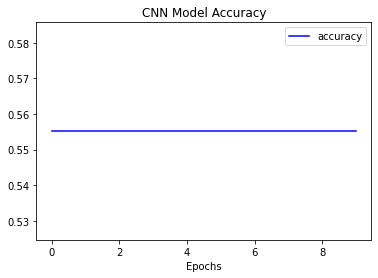

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='blue',label='accuracy')
# plt.plot(history.history['val_accuracy'],color='green',label='validation accuracy')
# plt.plot(history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
# plt.ylabel('')
plt.xlabel('Epochs')
plt.legend()
# plt.Color()
# plt.legend(['Train', 'Test'], loc='upper left')
plt.show()